In [1]:
from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
import math


metadata = dict(title='Rotating Bot', artist='Pete Florence',
        comment='Rotate time')
writer = animation.AVConvWriter(fps=20, metadata=metadata, bitrate=5000)


# constant velocity
v = 1

def derivs(state, t):

    dqdt = np.zeros_like(state)
    
    u = np.cos(state[2])
    
    dqdt[0] = 0 # rotating laser bot can't move
    
    dqdt[1] = 0 # rotating laser bot can't move

    #dqdt[2] = 0.4 # constant for now, but later will be u
    dqdt[2] = sin(t) # constant for now, but later will be u

    return dqdt

# create a time array from 0...30 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 10, dt)

# initial positions
# x and y are position of origin.  We move the origin, not the plane, so that the plane stays in the same spot in the plot.
# psi is yaw, and psidot is yawdot of plane
x = 0.0
y = 0.0
psi = -10.0

rad = pi/180.0

# initial state
state = np.array([x, y, psi*rad])

print "integrating..."
# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)
print "done"

xworld = y[:,0]
yworld = y[:,1]
psiworld = y[:,2]

from ObstacleField import ObstacleField
from Obstacle import Obstacle

obsField = ObstacleField()
obsField.randomField(M=7)
for i in obsField.ObstaclesList:
    i.computeTraj(psiworld,xworld,yworld)

integrating...
done


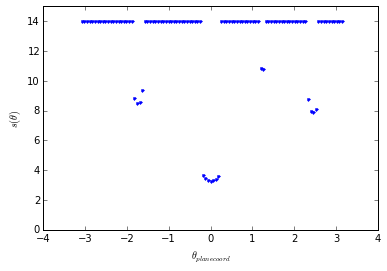

In [2]:
# Add laser
from LineCircleIntersect import intersect
laserLines = []
approxLines = []
D = 100 # Number of discrete data points from laser
laseAngles = np.linspace(-math.pi,math.pi,D+1)[0:D]

#S_max
S_maxdist = 14
S_max_t = np.linspace(-math.pi,math.pi,100)
S_max_x = S_maxdist*np.cos(S_max_t)
S_max_y = S_maxdist*np.sin(S_max_t)

xlist = []
ylist = []

laserDepths = laseAngles * 0.0


# Find laser depths at a certain point in time
# Need to not have this code copied
i = 0
for lasenum in range(len(laseAngles)):

    x_laser_endpoint = S_maxdist*math.cos(laseAngles[lasenum])
    y_laser_endpoint = S_maxdist*math.sin(laseAngles[lasenum])

    origin = np.array((0,0))
    laser_endpoint = np.array((x_laser_endpoint,y_laser_endpoint))
    for obs in obsField.ObstaclesList:
        Q = np.array((obs.xtraj[i],obs.ytraj[i]))
        r = obs.radius
        _, pt = intersect(origin,laser_endpoint,Q,r)
        if pt is not None:
            if (pt[0]**2 + pt[1]**2 < x_laser_endpoint**2 + y_laser_endpoint**2):
                x_laser_endpoint = pt[0]
                y_laser_endpoint = pt[1]

    depth = math.sqrt(x_laser_endpoint**2 + y_laser_endpoint**2)
    laserDepths[lasenum] = depth

 
%matplotlib inline
from coordTransforms import transformStandardPolarTheta_to_PlaneTheta
laseAngles2 = laseAngles * 0
for i in range(len(laseAngles)):
    laseAngles2[i] = transformStandardPolarTheta_to_PlaneTheta(laseAngles[i])

plt.plot(laseAngles2,laserDepths,'.')
plt.xlabel(r'$\theta_{plane coord}$')
plt.ylabel(r'$s(\theta)$')
plt.axis([-4, 4, 0, 15])
plt.show()

import csv
with open('laserdata.csv', 'wb') as csvfile:
    laserwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(laserDepths)):
        laserwriter.writerow([laseAngles2[i], laserDepths[i]])

weighted numpy polynomial regression weights for N = 12
[  3.28404841e+00  -1.22301783e-01   9.91018425e+00  -3.11137517e+00
  -2.48195054e+00   3.65568823e+00  -4.43862625e-01  -1.20187574e+00
   2.42735528e-01   1.50578970e-01  -3.07278526e-02  -6.41861101e-03
   1.25686714e-03]


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


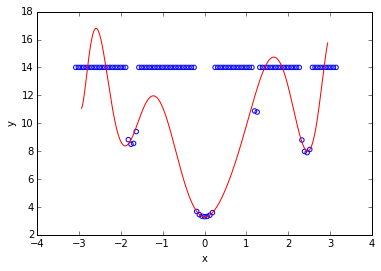

(100,)
(100,)


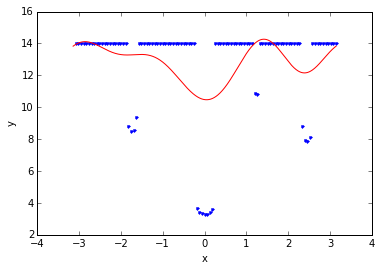

[ 2.30424153  2.30424142  1.89676677  2.76250583 -1.15627097 -4.39454228]
0
0  and  1  are close
0
1
2
3
4
[ 2.20424153  2.30434142  1.89676677  2.76250583 -1.15627097 -4.39454228]
(100, 6)
(6, 100)
(100, 100)
(6, 6)
     pcost       dcost       gap    pres   dres
 0:  5.8867e-01  6.8206e+02  3e+03  6e-01  2e+03
 1: -4.5135e-01 -6.5854e+01  7e+01  1e-02  3e+01
 2: -4.4385e-01 -1.3595e+00  9e-01  1e-04  3e-01
 3: -4.9974e-01 -5.7577e-01  8e-02  2e-13  2e-13
 4: -5.2694e-01 -5.4584e-01  2e-02  2e-13  1e-13
 5: -5.3137e-01 -5.3851e-01  7e-03  3e-13  3e-13
 6: -5.3236e-01 -5.3445e-01  2e-03  2e-13  3e-13
 7: -5.3257e-01 -5.3312e-01  5e-04  3e-13  3e-13
 8: -5.3263e-01 -5.3266e-01  2e-05  2e-13  2e-12
 9: -5.3264e-01 -5.3264e-01  4e-07  2e-13  4e-11
Optimal solution found.
[[ -1.81665076e+03]
 [  1.17574507e+03]
 [  1.36225083e+04]
 [ -2.39679737e+01]
 [  1.46377885e+00]
 [ -1.29524789e+04]]
(6,)
(6,)
(12,)


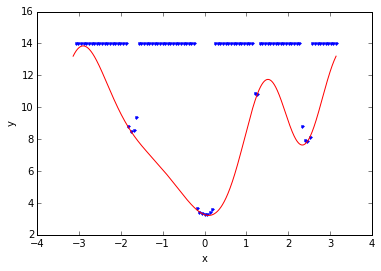

In [3]:
import scipy.optimize as opt
from linear_regression import LinearRegression

def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(-math.pi+0.2,math.pi-0.2,1000)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    


N = 12
lr = LinearRegression(laseAngles2,laserDepths,N)

print "weighted numpy polynomial regression weights for N = " + str(N)
weights = laserDepths * 1.0
#print weights
for index, value in enumerate(weights):
    weights[index] = (1/value)**4
#print weights
# an attempt to weight things in front more heavily 
# weights[len(weights)/4:3*len(weights)/4] = 10.0
w = np.polynomial.polynomial.polyfit(laseAngles2, laserDepths, N, w=weights)
print w
plot(lr,w)

def vonMises(x, c_i, mu_i, kappa):
    return c_i *  np.exp(kappa*np.cos(x - mu_i))

N_means = 6 # number of means
means = np.linspace(-math.pi,math.pi,N_means+1)
means = means[:-1]

def VMbasis(x, c_vec, mu_vec, kappa=1):
    if len(c_vec) != len(mu_vec):
        print "Need same size c_vec and mu_vec"
        return
    result = 0
    for i in range(len(c_vec)):
        result = result + vonMises(x, c_vec[i], mu_vec[i], kappa)
    return result

mu_vec = means
c_vec = means*0.0; c_vec[:] = 1.0

def VMbasisResidual(x, t, y):
    kappa=1
    c_vec = x[0:len(x)/2]
    mu_vec = x[len(x)/2:]
    if len(c_vec) != len(mu_vec):
        print "Need same size c_vec and mu_vec"
        return
    result = 0
    for i in range(len(c_vec)):
        result = result + vonMises(t, c_vec[i], mu_vec[i], kappa)
    return result - y

import scipy.optimize
from scipy.optimize import least_squares
t_train = np.array(laseAngles2)
y_train = np.array(laserDepths)

print np.shape(t_train)
print np.shape(y_train)

x0 = np.ones((12,1))[:,0]
res_lsq = least_squares(VMbasisResidual, x0, args=(t_train, y_train))

def plotVMbasisHere(x_vm, t, y):
    plt.plot(t,y,'.')
    x = np.linspace(-math.pi,math.pi,1000)
    y_hat = x*0.0
    c_vec = x_vm[0:len(x_vm)/2]
    mu_vec = x_vm[len(x_vm)/2:]
    for index,value in enumerate(y_hat):
        y_hat[index] = VMbasis(x[index], c_vec, mu_vec)
    plt.plot(x, y_hat, color='r')
    #plt.axis([-3.14, 3.14, 7.595, 7.600])
    #plt.axis([-3.14, 3.14, 0, 10])
    plt.xlabel('x'); plt.ylabel('y'); plt.show()
    
plotVMbasisHere(res_lsq.x, t_train, y_train)

x_vm = res_lsq.x
c_vec = x_vm[0:len(x_vm)/2]
mu_vec = x_vm[len(x_vm)/2:]

print mu_vec
tolerance = 0.001
step = 0.0001

def separateMeans():
    converged = False
    i = -1
    while(converged == False):
        i = i + 1
        print i
        if (mu_vec[i] - mu_vec[i+1])**2 < tolerance:
            print i, " and ", i+1, " are close"
            mu_vec[i] = mu_vec[i] - 0.1
            mu_vec[i+1] = mu_vec[i+1] + step
            i = -1
        if (i == len(mu_vec)-2):
            converged = True

separateMeans()            
print mu_vec

def vonMises(x, c_i, mu_i, kappa):
    return c_i *  np.exp(kappa*np.cos(x - mu_i))

def setUpFeatureMatrix(x_train, mu_vec):
    A = np.zeros((len(x_train),len(mu_vec)))
    for row_index,row in enumerate(A):
        for col_index, value in enumerate(row):
            A[row_index,col_index] = vonMises(x_train[row_index], 1, mu_vec[col_index], kappa=1)
    return np.matrix(A)
            
A_pete = setUpFeatureMatrix(laseAngles2, mu_vec)

def setUpQP():
      
    #W = weighting matrix
    weights = laserDepths * 1.0
    for index, value in enumerate(weights):
        weights[index] = (1/value)**4
    W_pete = np.diag(weights)
    
    #b = vector of sensor measurements
    b_pete = laserDepths
    
    return np.matrix(W_pete), np.matrix(b_pete)
    
W_pete, b_pete = setUpQP()

print np.shape(A_pete)
print np.shape(A_pete.T)
print np.shape(A_pete * A_pete.T)
print np.shape(A_pete.T * A_pete)

import cvxopt

# P = A^T W A
P = cvxopt.matrix(A_pete.T * W_pete * A_pete)

# q^T = -b^T A
# q = -A^T b
q = cvxopt.matrix(- A_pete.T * W_pete *b_pete.T)

# G = A
G = cvxopt.matrix(A_pete)

# h = b_pete
h = cvxopt.matrix(b_pete.T)

A_zeros = np.copy(A_pete)
A_zeros[::] = 0

b_zeros = np.copy(b_pete)
b_zeros[:] = 0

A = cvxopt.matrix(A_zeros)
b = cvxopt.matrix(b_zeros.T)

# find the solution 
solution = cvxopt.solvers.qp(P, q, G, h)

alpha = np.array(solution['x'])

print alpha

c_constrained = alpha[:,0]

print np.shape(c_constrained)
print np.shape(mu_vec)
x_vm = np.hstack((c_constrained, mu_vec))
print np.shape(x_vm)

    
plotVMbasisHere(x_vm, t_train, y_train)

integrating...
done
(200, 12)
0


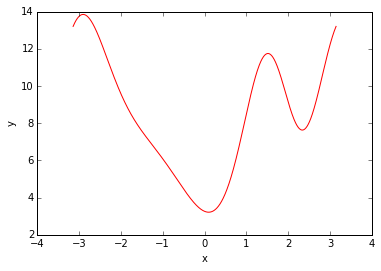

1


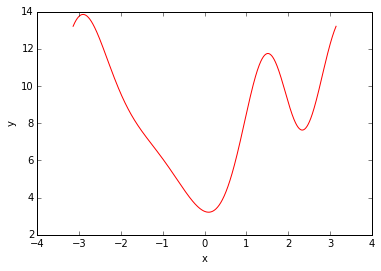

2


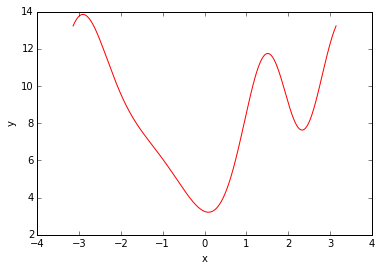

3


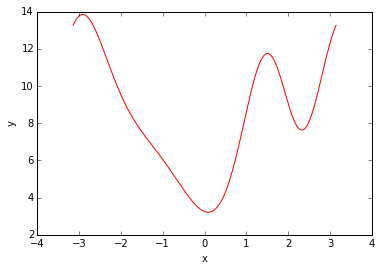

4


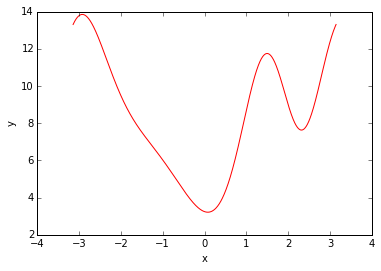

5


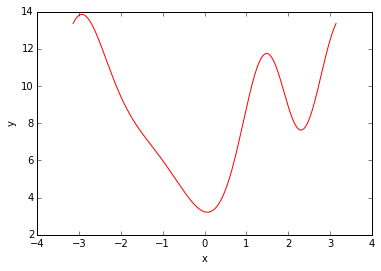

6


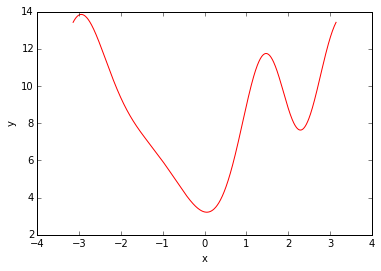

7


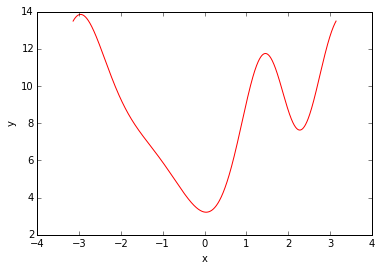

8


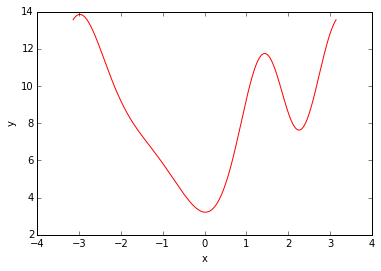

9


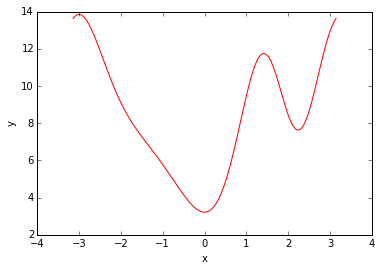

10


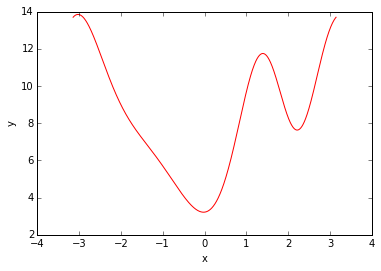

11


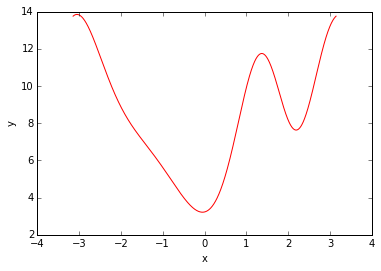

12


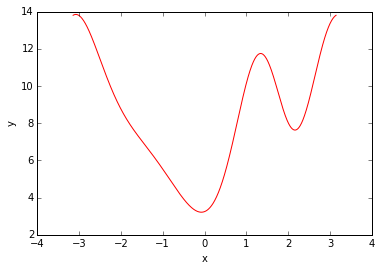

13


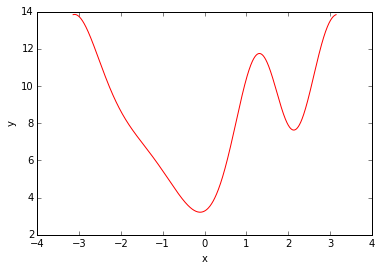

14


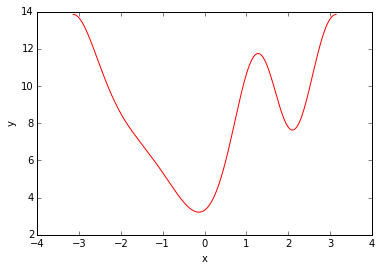

15


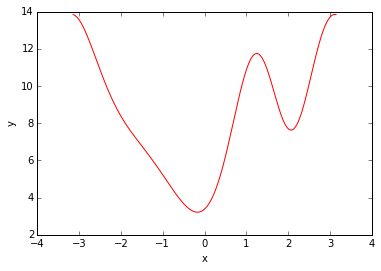

16


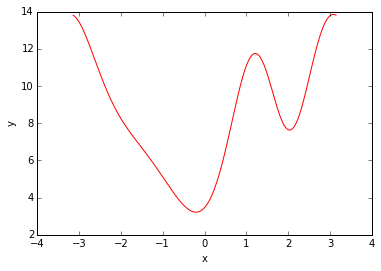

17


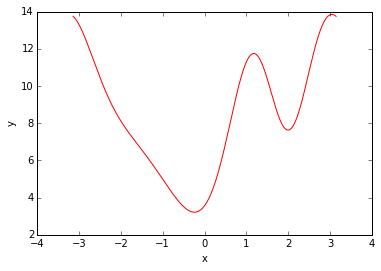

18


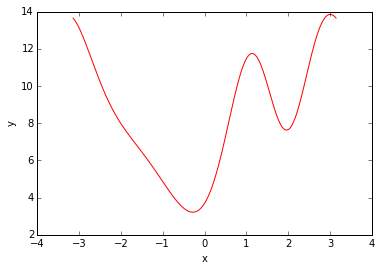

19


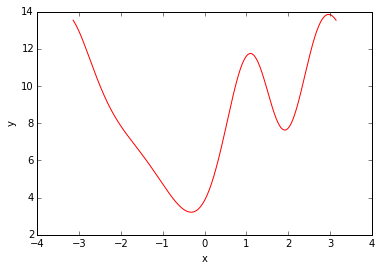

20


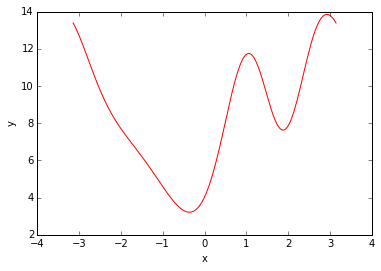

21


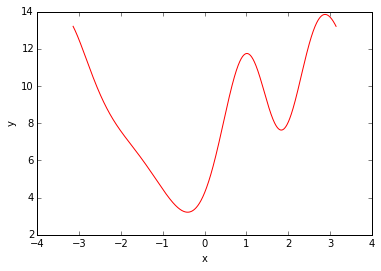

22


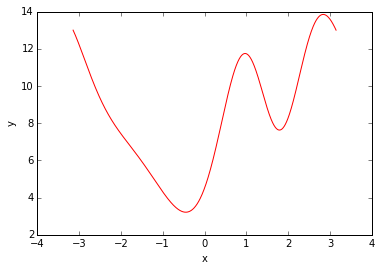

23


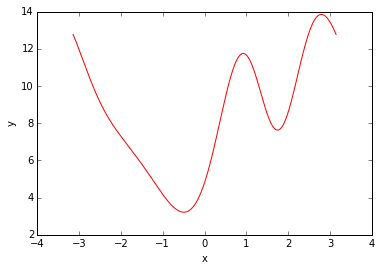

24


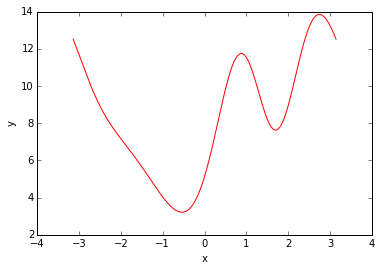

25


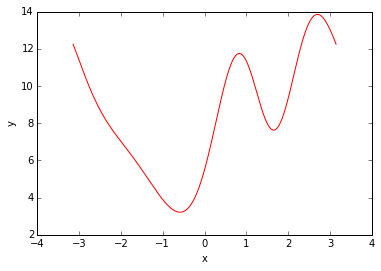

26


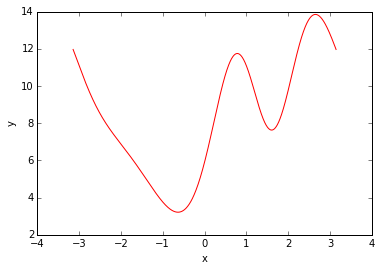

27


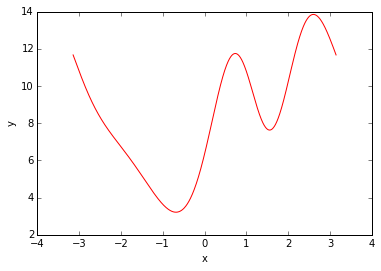

28


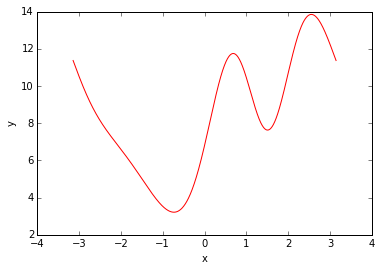

29


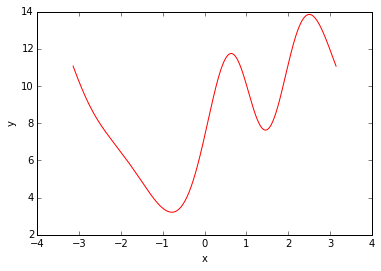

30


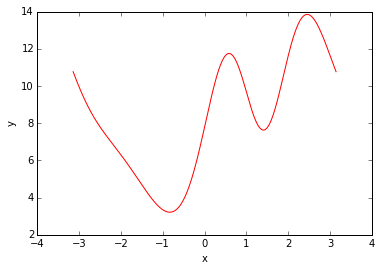

31


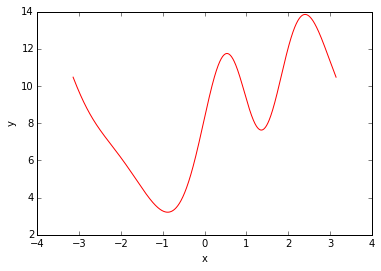

32


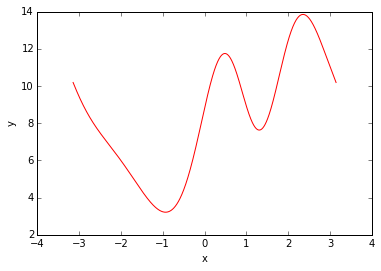

33


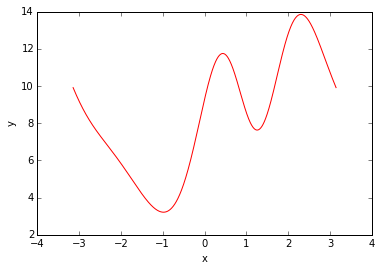

34


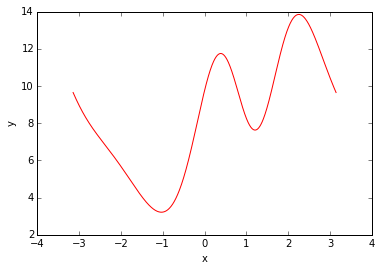

35


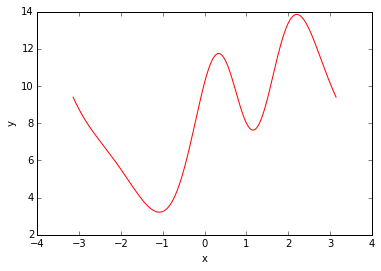

36


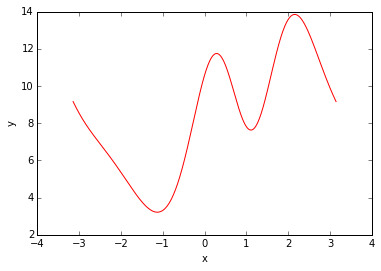

37


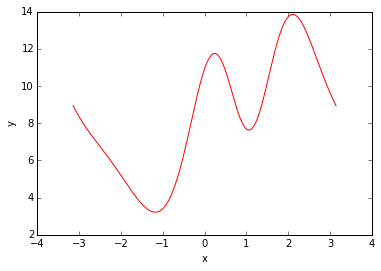

38


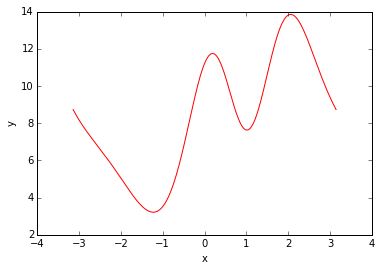

39


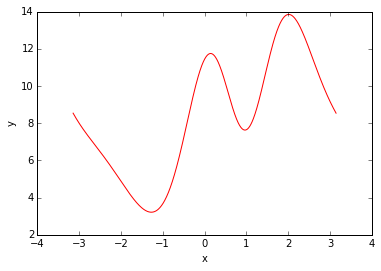

40


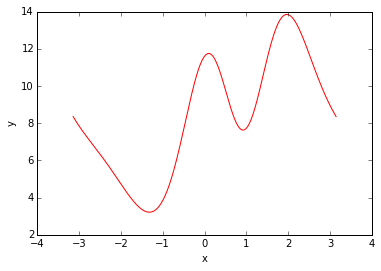

41


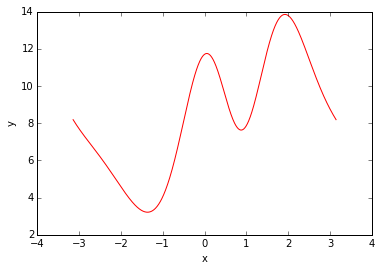

42


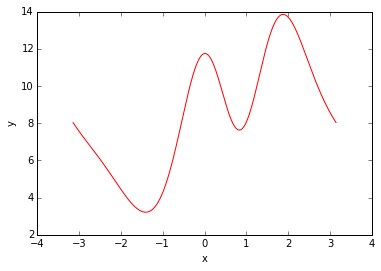

43


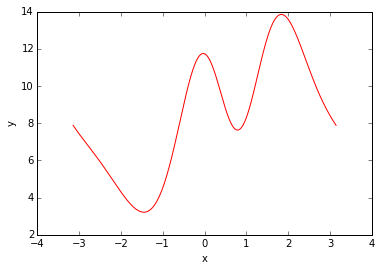

44


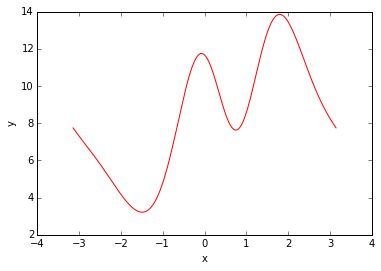

45


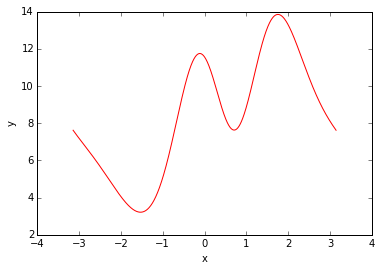

46


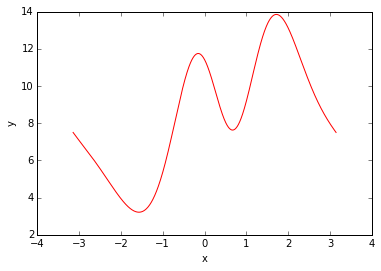

47


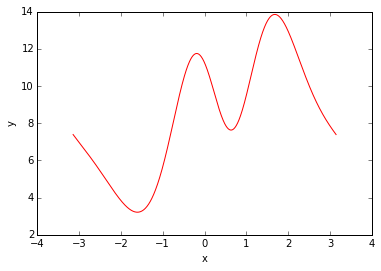

48


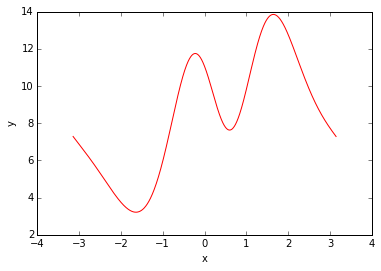

49


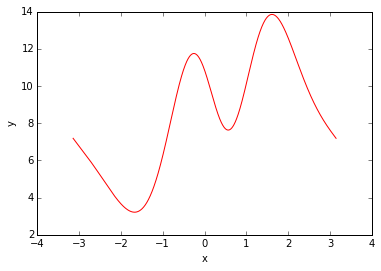

50


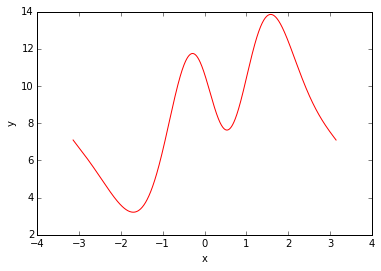

51


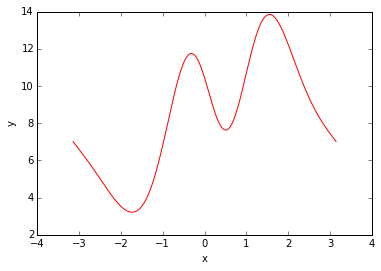

52


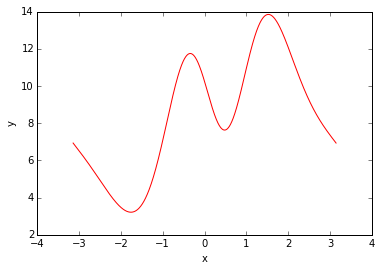

53


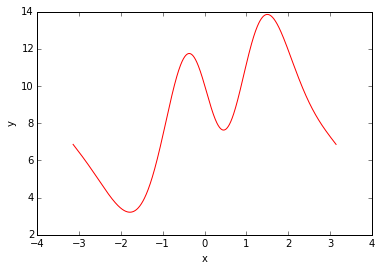

54


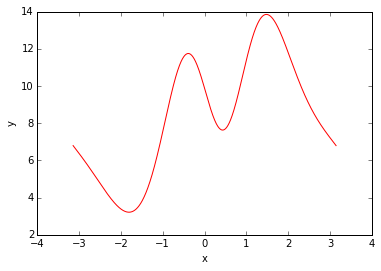

55


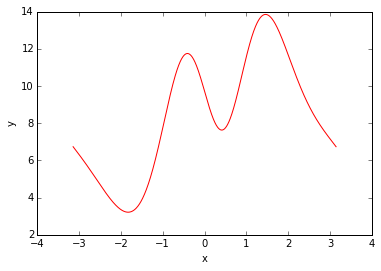

56


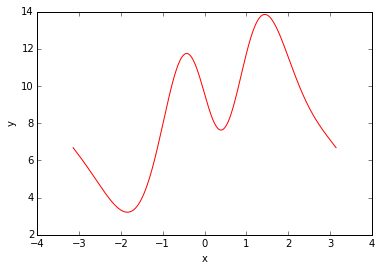

57


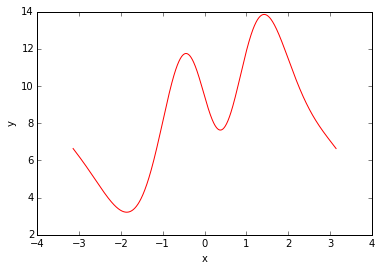

58


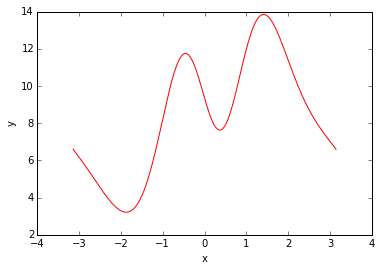

59


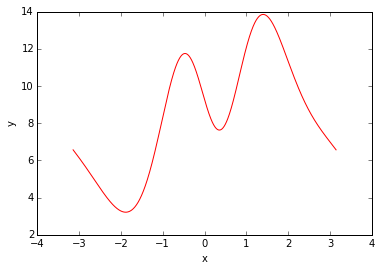

60


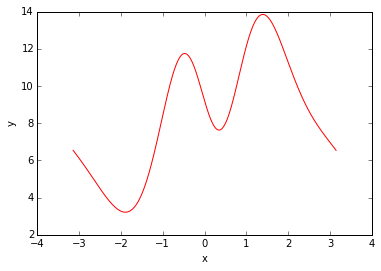

61


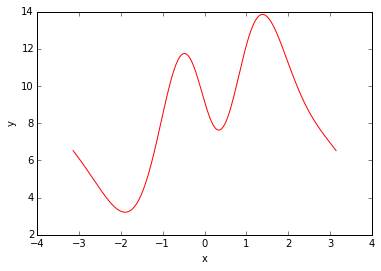

62


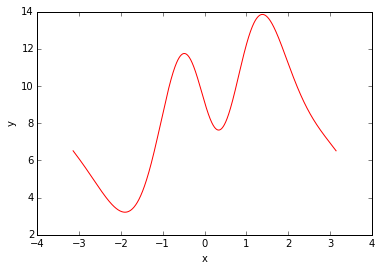

63


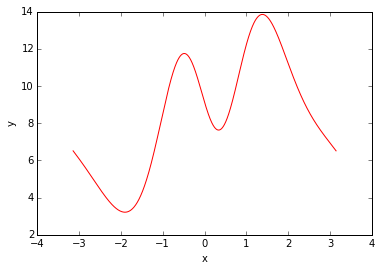

64


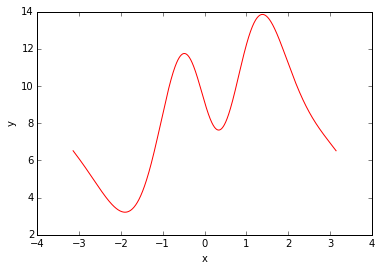

65


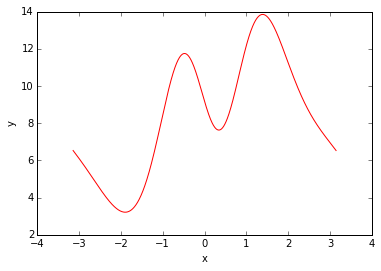

66


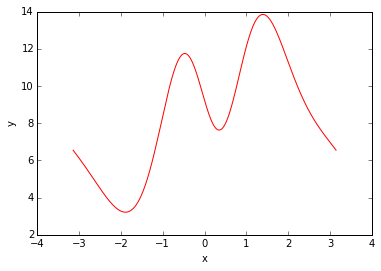

67


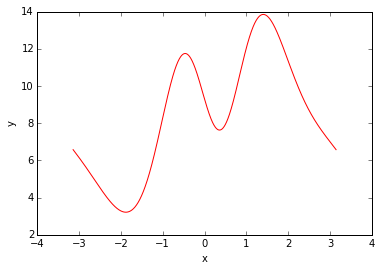

68


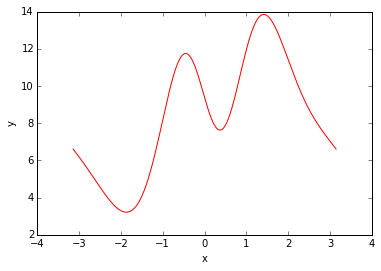

69


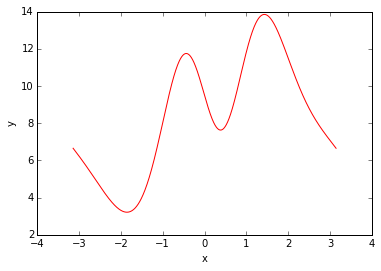

70


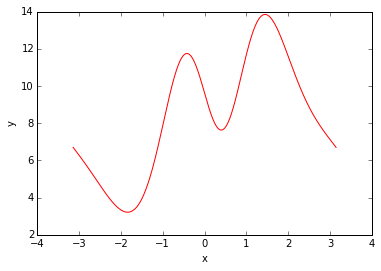

71


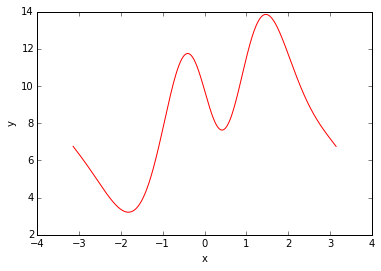

72


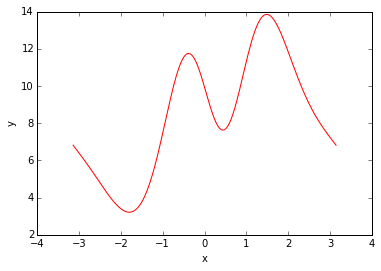

73


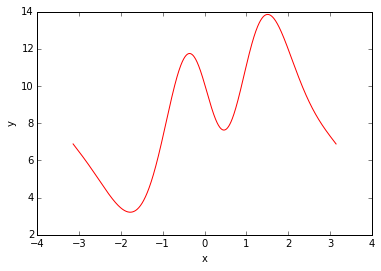

74


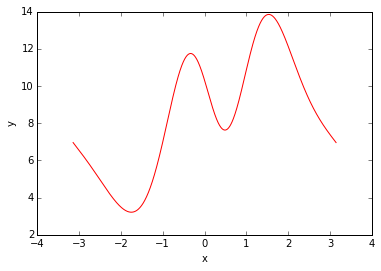

75


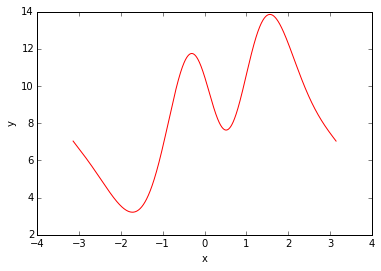

76


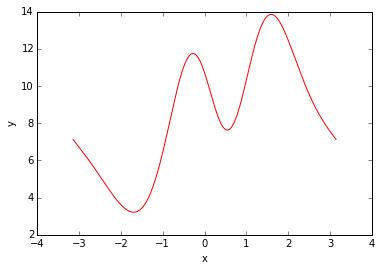

77


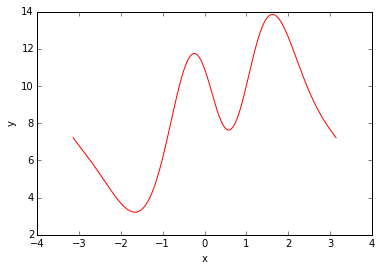

78


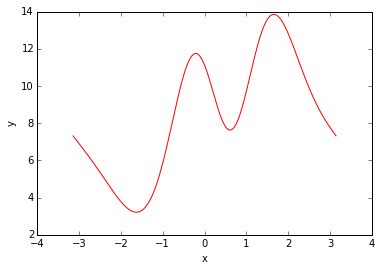

79


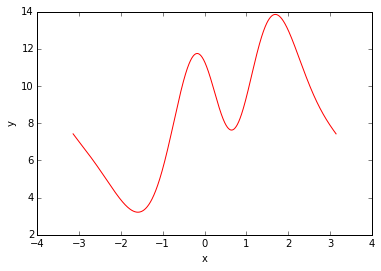

80


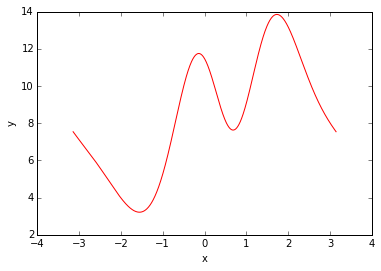

81


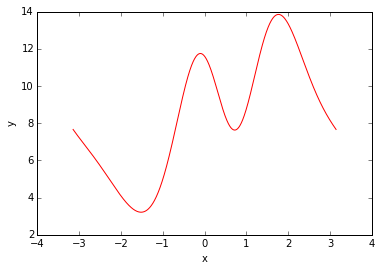

82


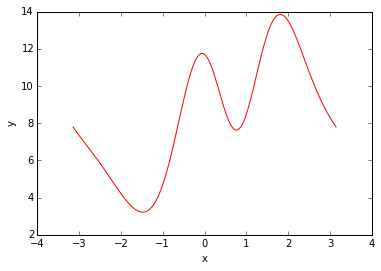

83


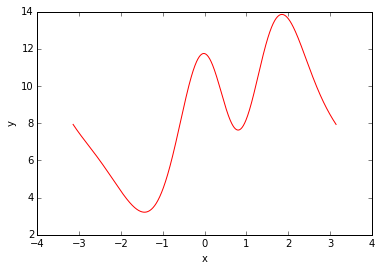

84


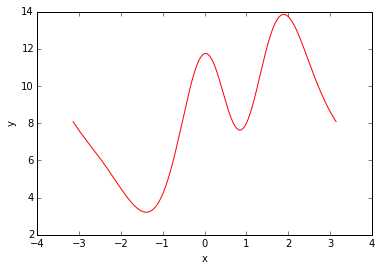

85


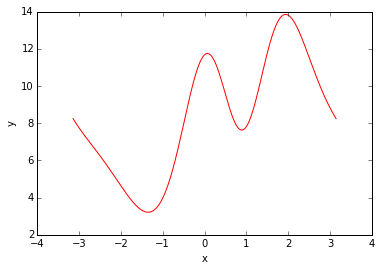

86


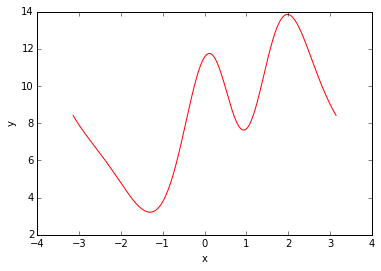

87


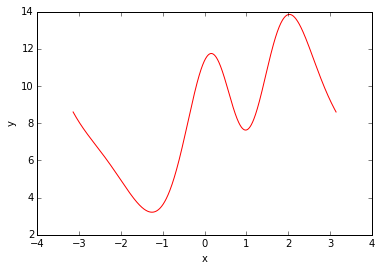

88


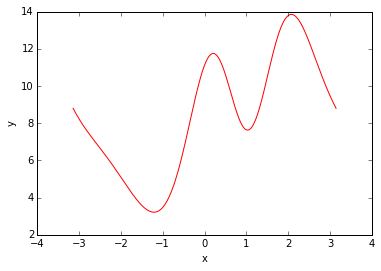

89


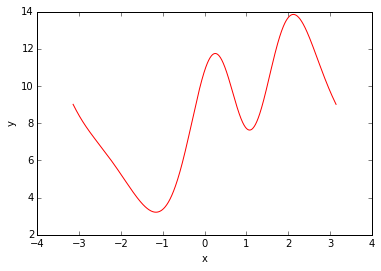

90


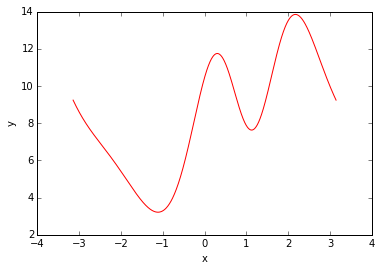

91


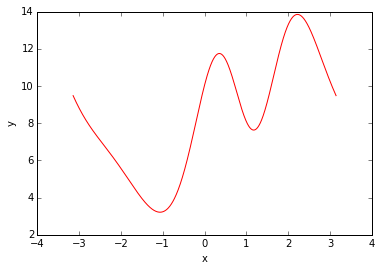

92


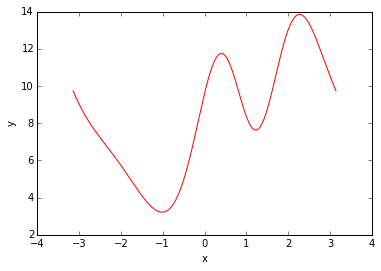

93


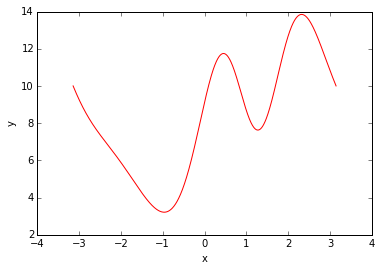

94


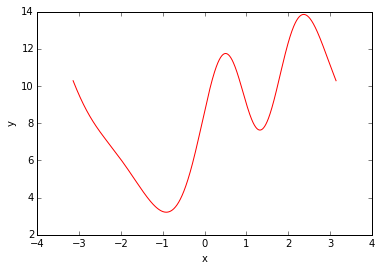

95


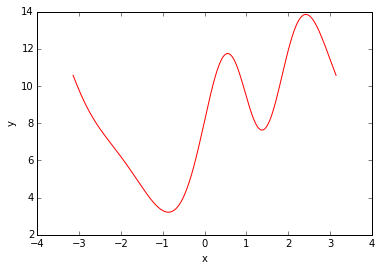

96


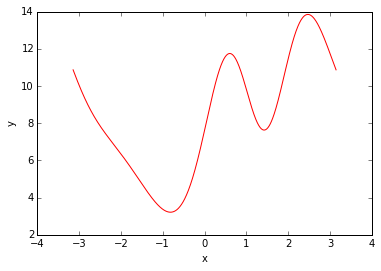

97


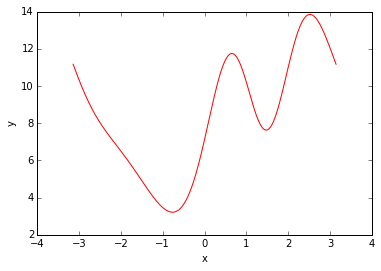

98


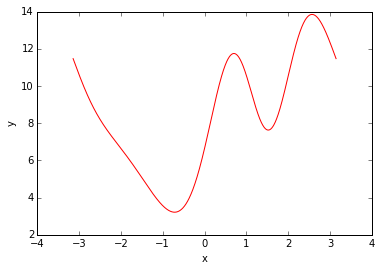

99


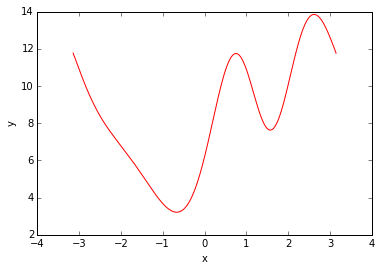

100


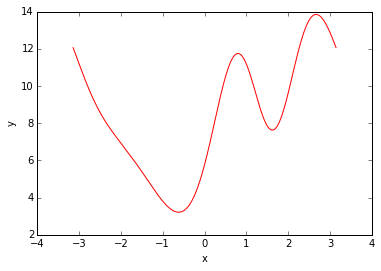

101


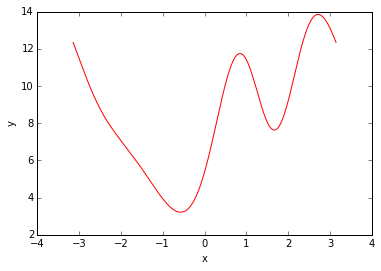

102


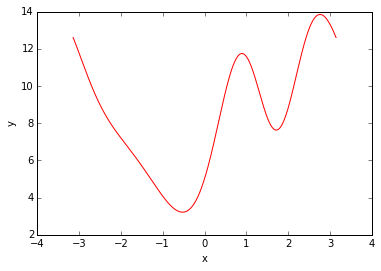

103


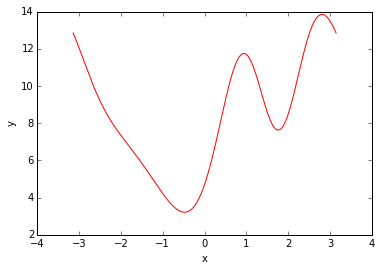

104


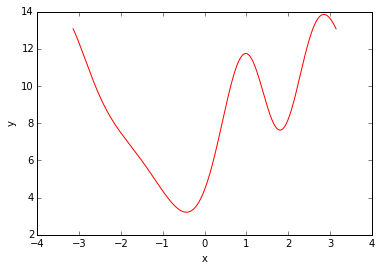

105


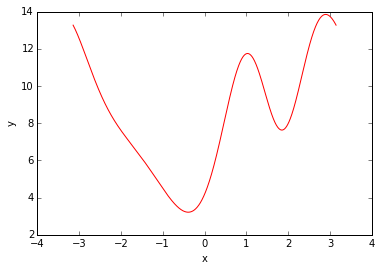

106


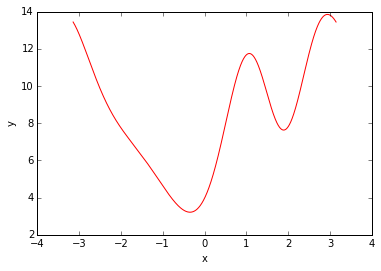

107


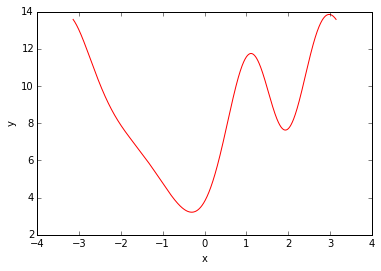

108


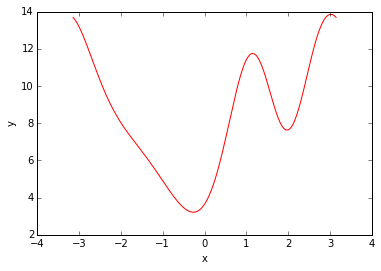

109


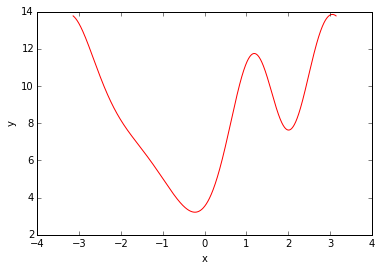

110


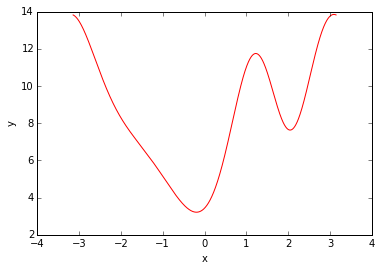

111


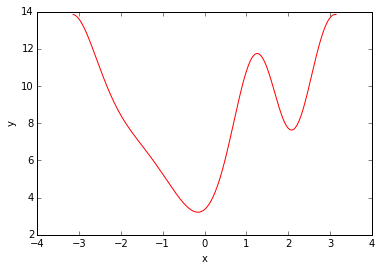

112


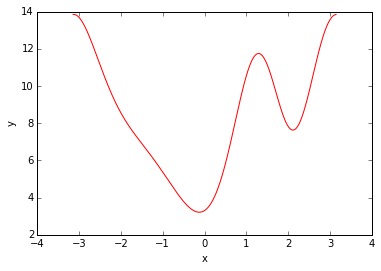

113


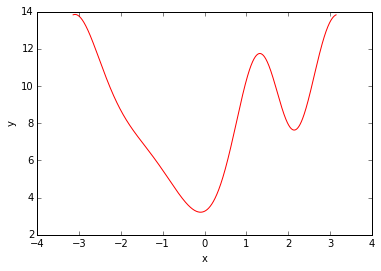

114


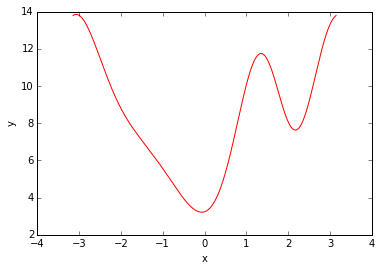

115


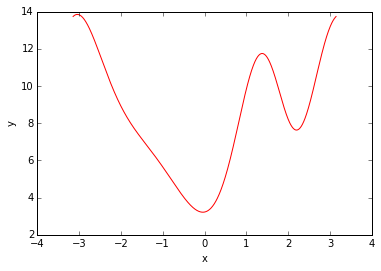

116


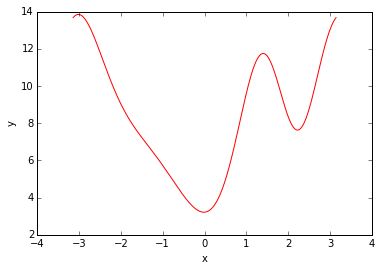

117


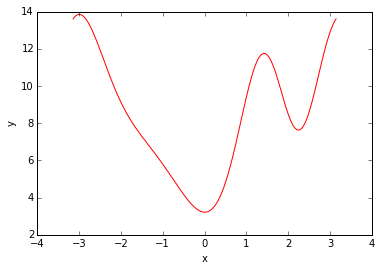

118


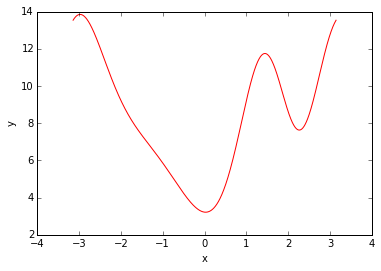

119


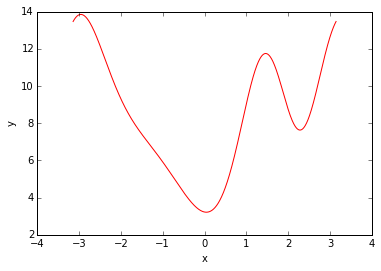

120


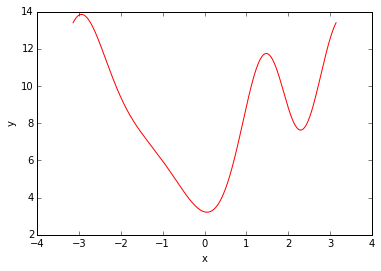

121


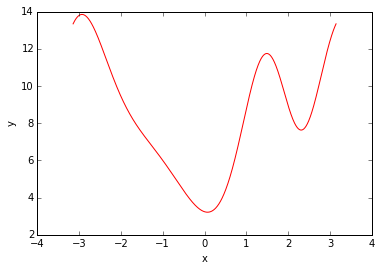

122


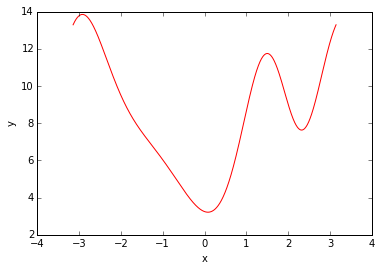

123


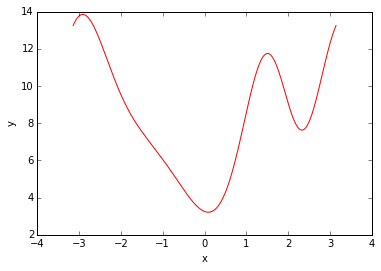

124


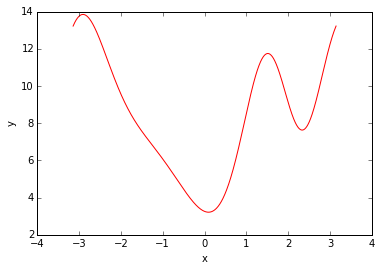

125


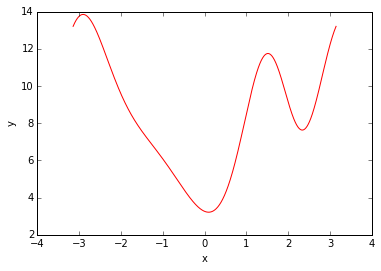

126


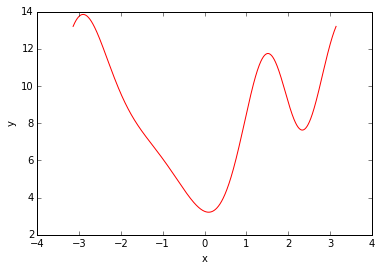

127


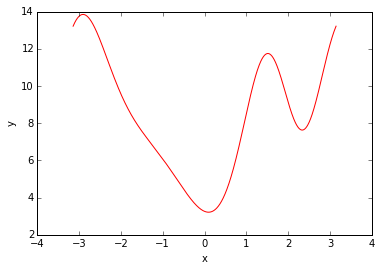

128


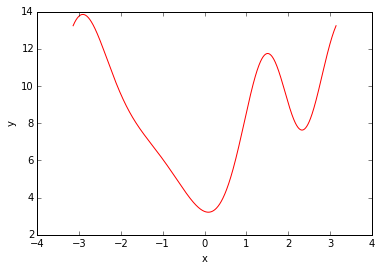

129


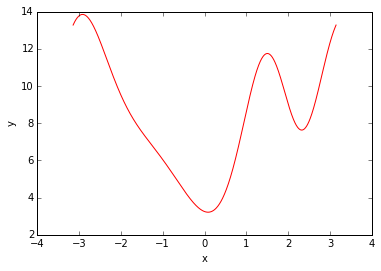

130


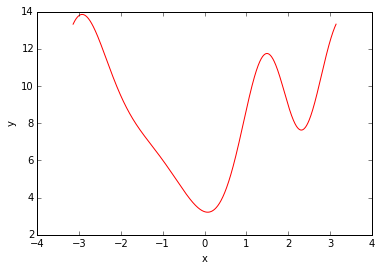

131


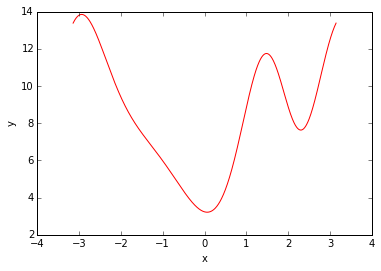

132


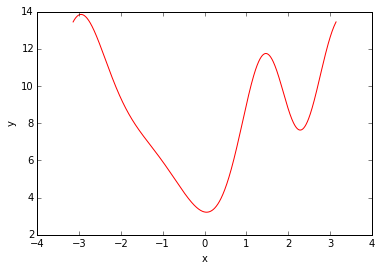

133


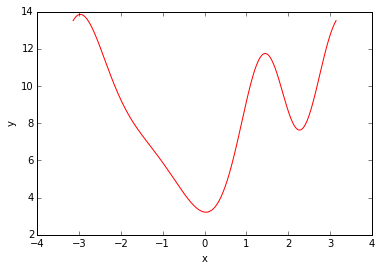

134


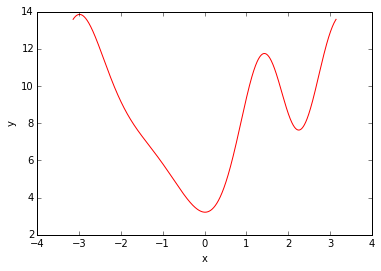

135


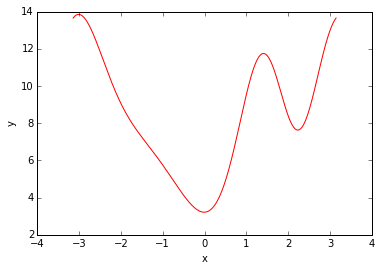

136


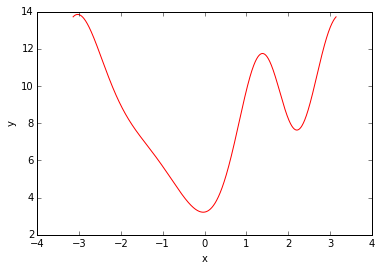

137


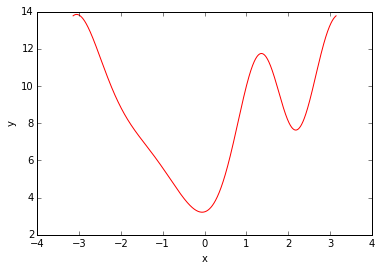

138


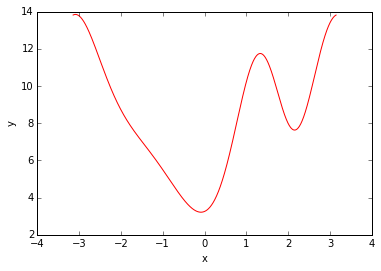

139


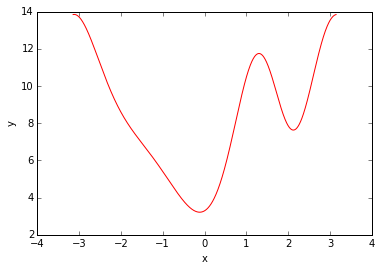

140


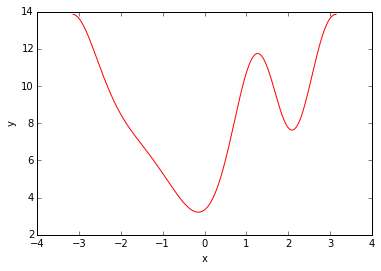

141


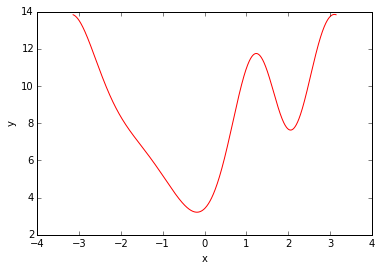

142


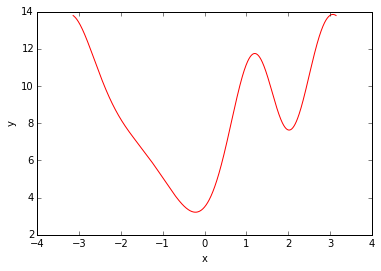

143


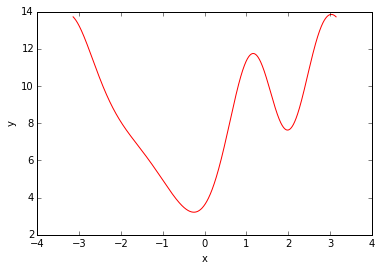

144


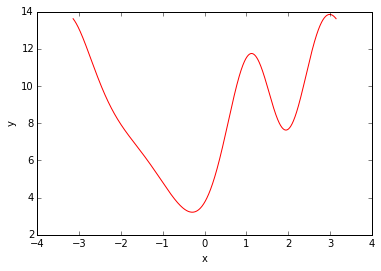

145


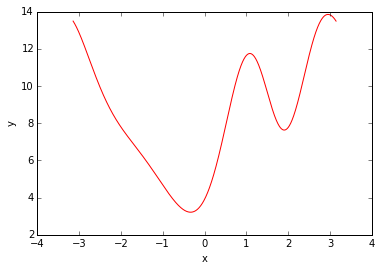

146


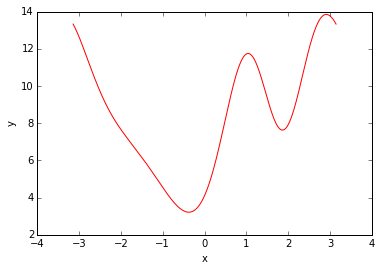

147


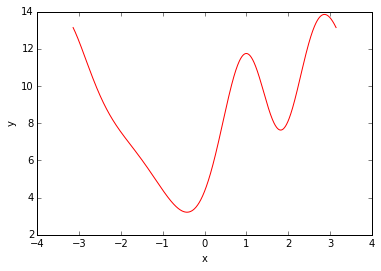

148


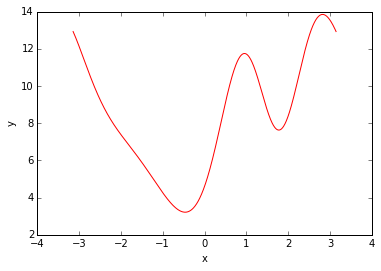

149


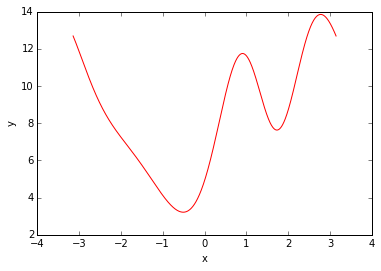

150


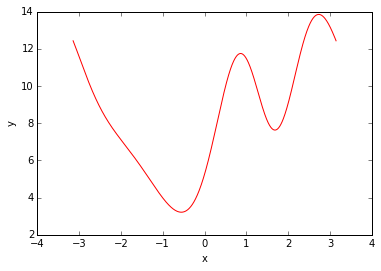

151


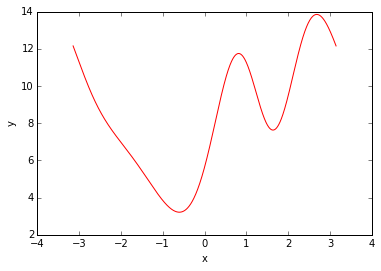

152


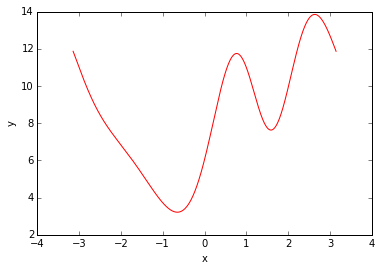

153


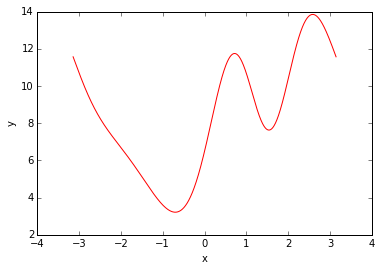

154


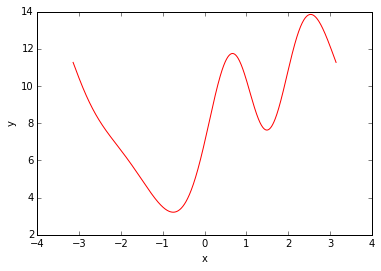

155


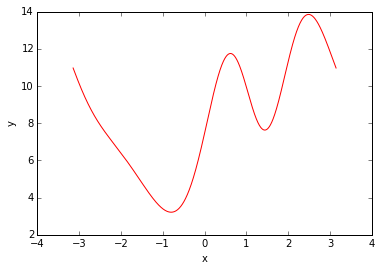

156


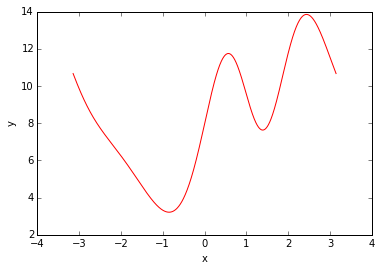

157


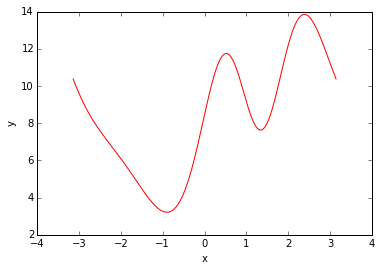

158


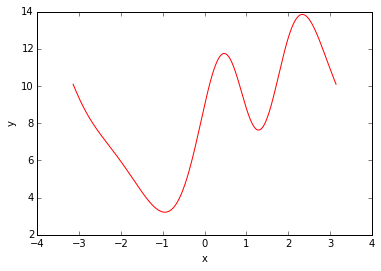

159


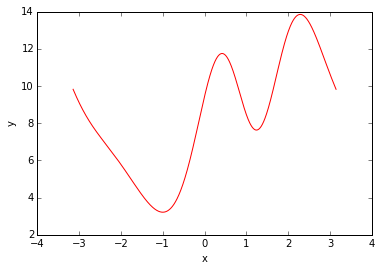

160


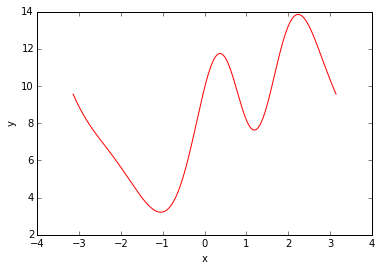

161


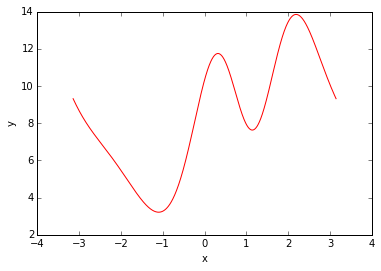

162


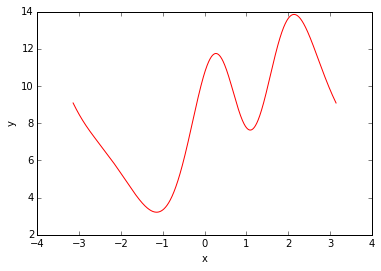

163


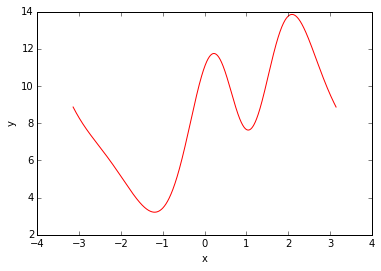

164


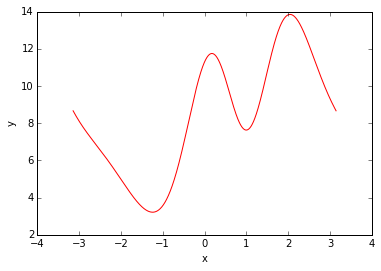

165


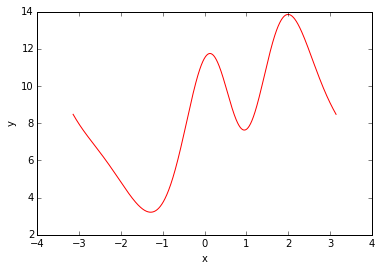

166


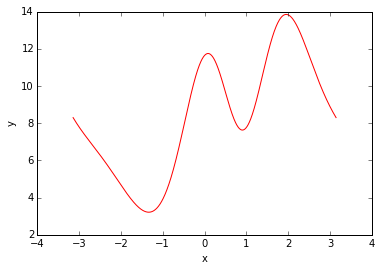

167


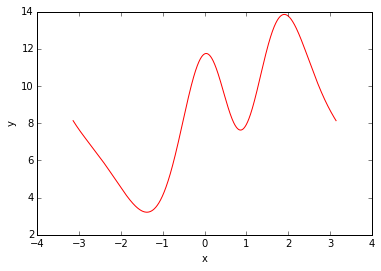

168


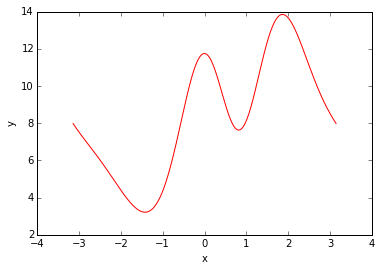

169


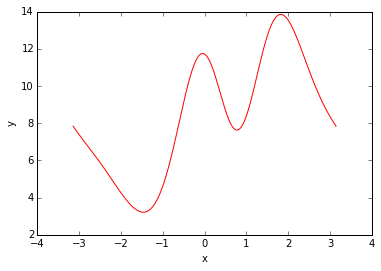

170


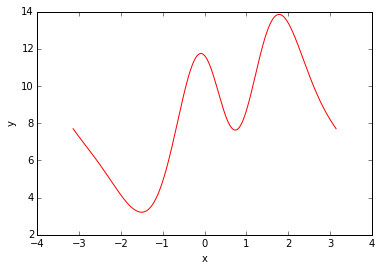

171


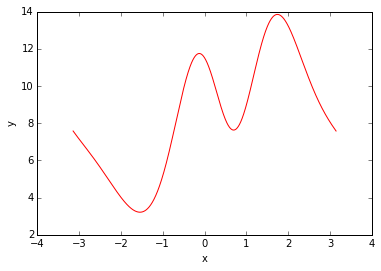

172


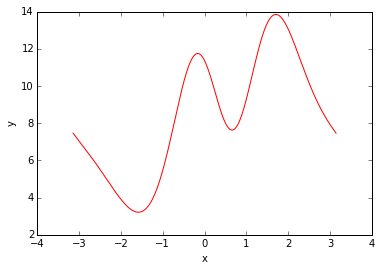

173


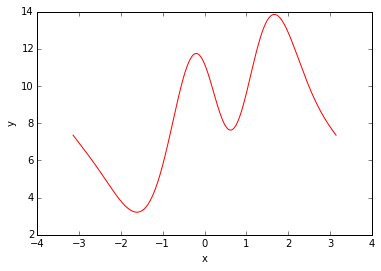

174


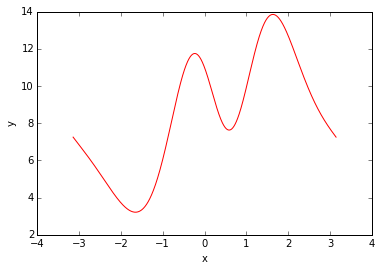

175


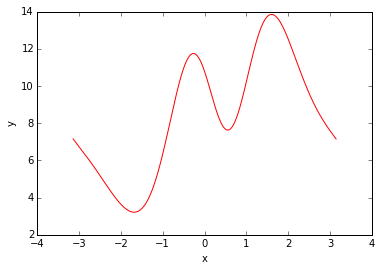

176


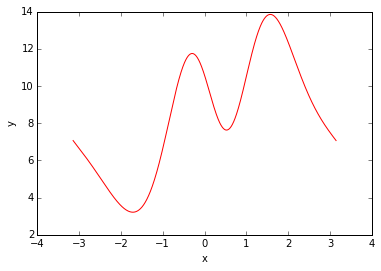

177


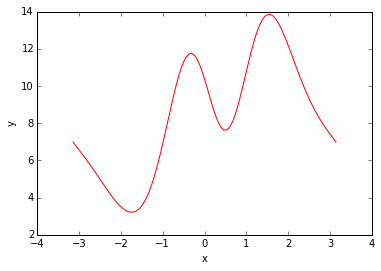

178


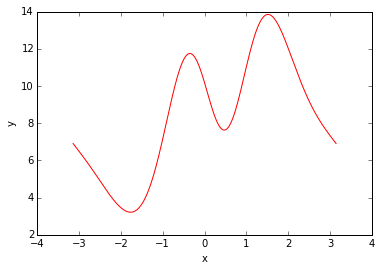

179


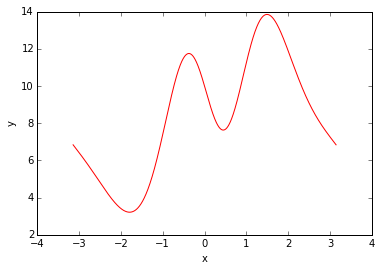

180


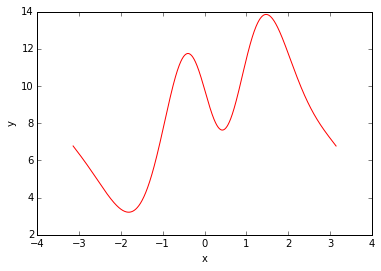

181


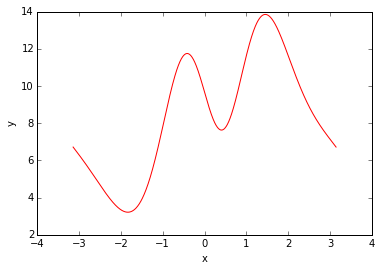

182


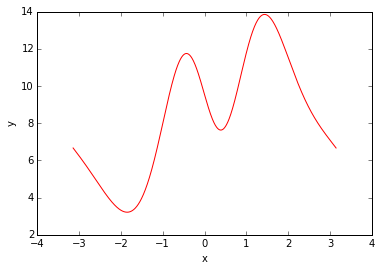

183


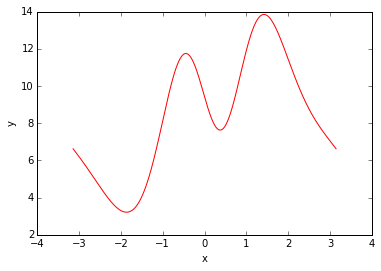

184


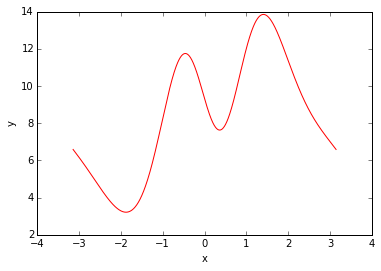

185


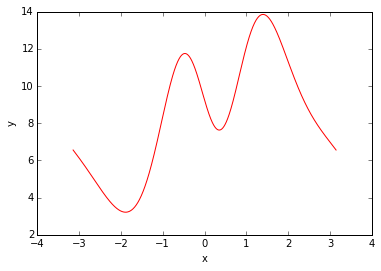

186


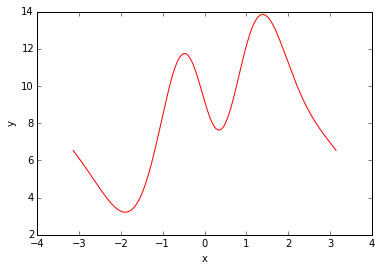

187


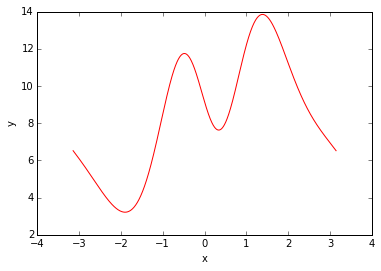

188


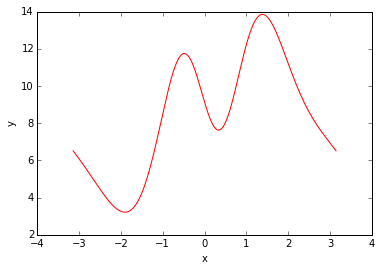

189


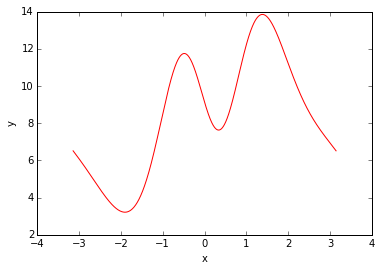

190


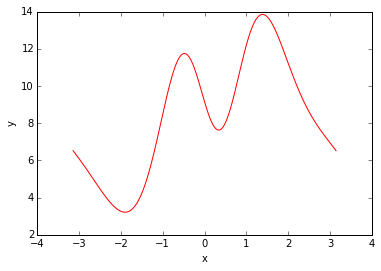

191


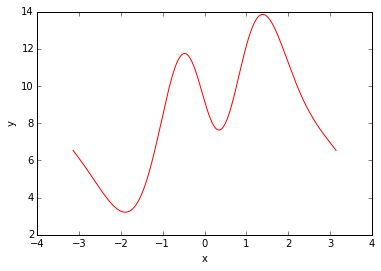

192


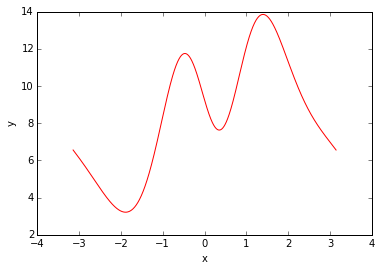

193


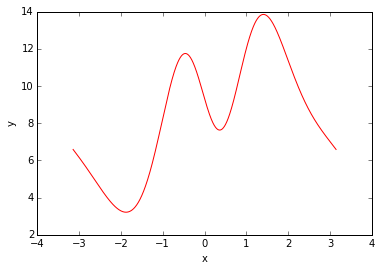

194


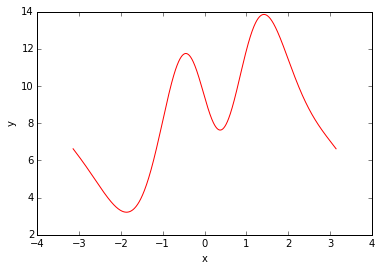

195


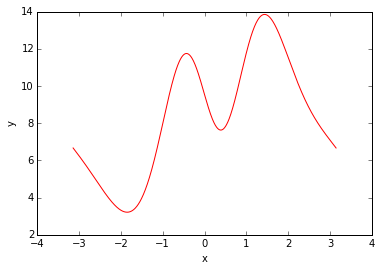

196


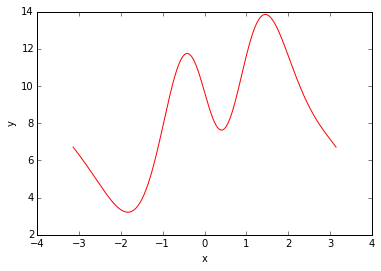

197


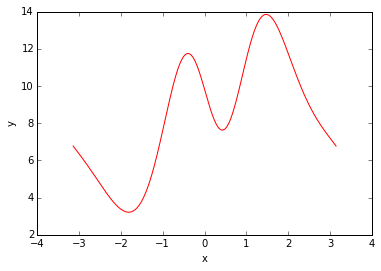

198


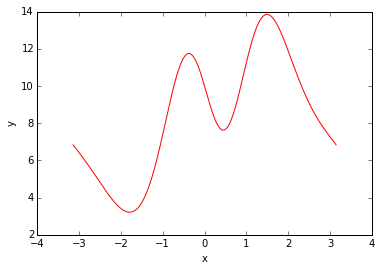

199


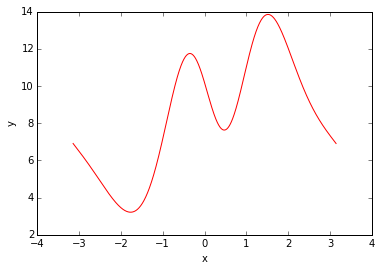

In [4]:
# simulate pixel dynamics

def pixelDerivs(pixelState, t):
  
    dqdt = np.zeros_like(pixelState)
    #     c_vec = x_vm[0:len(x_vm)/2]
    #     mu_vec = x_vm[len(x_vm)/2:]

    u = sin(t) # u
    
    dqdt[0]  = 0
    dqdt[1]  = 0
    dqdt[2]  = 0
    dqdt[3]  = 0
    dqdt[4]  = 0
    dqdt[5]  = 0
    dqdt[6]  = -u 
    dqdt[7]  = -u
    dqdt[8]  = -u
    dqdt[9]  = -u
    dqdt[10] = -u 
    dqdt[11] = -u

    return dqdt

# reuse dt and t from before
# dt = 0.05
# t = np.arange(0.0, 1, dt)

# initial positions
# the initial positions are the weights from the initial measurement

# initial state
pixelState = x_vm

print "integrating..."
# integrate your ODE using scipy.integrate.
pixelY = integrate.odeint(pixelDerivs, pixelState, t)
print "done"

print np.shape(pixelY)

def plotJustVMBasis(x_vm, t, y):
    x = np.linspace(-math.pi,math.pi,1000)
    y_hat = x*0.0
    c_vec = x_vm[0:len(x_vm)/2]
    mu_vec = x_vm[len(x_vm)/2:]
    for index,value in enumerate(y_hat):
        y_hat[index] = VMbasis(x[index], c_vec, mu_vec)
    plt.plot(x, y_hat, color='r')
    #plt.axis([-3.14, 3.14, 7.595, 7.600])
    #plt.axis([-3.14, 3.14, 0, 10])
    plt.xlabel('x'); plt.ylabel('y'); plt.show()


for i in range(len(t)):
    print i
    plotJustVMBasis(pixelY[i], t_train, y_train)

In [5]:
import os
os.system("rm bot.mp4")
%matplotlib qt
plt.rcParams['figure.figsize'] = 10, 10
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-15, 15), ylim=(-15, 15))
#ax = fig.add_subplot(121, autoscale_on=False, xlim=(-4, 4), ylim=(0, 16))
#ax.grid()

im = plt.imread('bot.png')
newax = fig.add_axes([0.477, 0.46, 0.07, 0.1], anchor='SW')
newax.imshow(im)
newax.axis('off')
ax.set_aspect('equal', 'datalim')
     
S_max, = ax.plot([], [], '--' , lw=1, color='red')   
obstacles, = ax.plot([], [], 'o', markersize=35, lw=2, color='gray')
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

for index in range(D):
    lobj = ax.plot([],[],'-',lw=0.5,color='red')[0]
    laserLines.append(lobj)
    approxobj = ax.plot([],[],'-',lw=0.5,color='green')[0]
    approxLines.append(approxobj)

def init():
    S_max.set_data([], [])
    obstacles.set_data([], [])
    time_text.set_text('')
    
    for laserLine in laserLines:
        laserLine.set_data([],[])

    for approxLine in approxLines:
        approxLine.set_data([],[])
    
    return obstacles, time_text, laserLines, approxLines

def animate(i):
    
    # Draw the maximum sensor horizon
    S_max.set_data(S_max_x,S_max_y)
    
    
    # Draw the obstacles as just a bunch of points
    
    all_obs_x = []
    all_obs_y = []
    
    for obs in obsField.ObstaclesList:
        all_obs_x.append(obs.xtraj[i]) #+ obs.plotX) put back in this to plot little points around the circle
        all_obs_y.append(obs.ytraj[i]) #+ obs.plotY)
    
    #all_obs_x = [x_obj1[i], x_obj2[i]]
    #all_obs_y = [y_obj1[i], y_obj2[i]]
    obstacles.set_data(all_obs_x, all_obs_y)
    
    # Draw in the time
    time_text.set_text(time_template%(i*dt))
    
    xlist = []
    ylist = []
    
    approx_xlist = []
    approx_ylist = []
    
    # Draw the laser intersecting obstacles
    for lasenum, lasevalue in enumerate(laseAngles):

        x_laser_endpoint = S_maxdist*math.cos(laseAngles[lasenum])
        y_laser_endpoint = S_maxdist*math.sin(laseAngles[lasenum])
        
        origin = np.array((0,0))
        laser_endpoint = np.array((x_laser_endpoint,y_laser_endpoint))
        for obs in obsField.ObstaclesList:
            Q = np.array((obs.xtraj[i],obs.ytraj[i]))
            r = obs.radius
            _, pt = intersect(origin,laser_endpoint,Q,r)
            if pt is not None:
                if (pt[0]**2 + pt[1]**2 < x_laser_endpoint**2 + y_laser_endpoint**2):
                    x_laser_endpoint = pt[0]
                    y_laser_endpoint = pt[1]
        
        # Currently turned off drawing red
#         xlist.append([[0,x_laser_endpoint]])
#         ylist.append([[0,y_laser_endpoint]])
        
        xlist.append([[0,0]])
        ylist.append([[0,0]])
        
        # Draw the approximation
        
        
        lasevalue2 = transformStandardPolarTheta_to_PlaneTheta(lasevalue)
        
        c_vec = pixelY[i][0:len(x_vm)/2]
        mu_vec = pixelY[i][len(x_vm)/2:]
        approx_distance = VMbasis(lasevalue2, c_vec, mu_vec)
        
        x_approx_endpoint = approx_distance*math.cos(lasevalue)
        y_approx_endpoint = approx_distance*math.sin(lasevalue)
        
        approx_xlist.append([[0,x_approx_endpoint]])
        approx_ylist.append([[0,y_approx_endpoint]])
  

    for lnum,line in enumerate(laserLines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 
        
    for lnum,approxline in enumerate(approxLines):
        approxline.set_data(approx_xlist[lnum], approx_ylist[lnum]) # set data for each line separately. 

    return obstacles, time_text, laserLines, approxLines

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
    interval=20, blit=False, init_func=init)
ani.save('bot.mp4', fps=20, bitrate=5000, codec="h264", writer=writer)
plt.show()

In [6]:

# os.system("rm bot_h264.mp4")
# os.system("avconv -i bot.mp4 -c:v h264 -c:a copy bot_h264.mp4")

In [7]:
# import os
# import io
# import base64
# from IPython.display import HTML

# video = io.open('/Users/pflomacpro/GeometricPDEs/_RotatingBot/bot_h264.mp4', 'r+b').read()
# encoded = base64.b64encode(video)
# HTML(data='''<video alt="test" controls>
#                 <source src="data:video/mp4;base64,{0}" type="video/mp4" />
#              </video>'''.format(encoded.decode('ascii')))